# Project Overview

## Artificial Neural Networks


How they work:
Artificial Neural Network(ANN) uses the processing of the brain as a basis to develop algorithms that can be used to model complex patterns and prediction problems.

In our brain, there are billions of cells called neurons, which processes information in the form of electric signals. External information is received by the dendrites of the neuron, processed in the neuron cell body, converted to an output and passed through the Axon to the next neuron. The next neuron can choose to either accept it or reject it depending on the strength of the signal.[1]

![ann](img/photo_1.png)

# Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# The Data

The same data and techinques for manipulating it into a usable data frame are used below as in the Baseline Modeling Notebook.

In [31]:
df = pd.read_excel('Broadway_Grosses.xlsx')

In [32]:
df['show'] = df['show'].str.capitalize()

In [33]:
df = df[~df.type.str.contains("Special")]

In [34]:
df = df.set_index('date')

In [35]:
df.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2017-05-21,NaN,Play,Hudson,4,0,212626,$,0.48,3378,NaN,0.87,0,Mystery,1,0
2017-05-28,NaN,Play,Hudson,7,0,298438,212626,0.45,5079,3378.0,0.75,0,Mystery,1,0
2017-06-04,NaN,Play,Hudson,8,0,282053,298438,0.36,5230,5079.0,0.67,0,Mystery,1,0
2017-06-11,NaN,Play,Hudson,8,0,288446,282053,0.37,5554,5230.0,0.72,0,Mystery,1,0
2017-06-18,NaN,Play,Hudson,8,0,301461,288446,0.39,6018,5554.0,0.78,0,Mystery,1,0


In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

show                0
type                0
theatre             0
previews            0
performances        0
grosses             0
prev_week_gross     0
GG%GP               0
attend              0
prev_week_attend    0
%cap                0
close_month         0
genre               0
tony_noms           0
tony_awards         0
dtype: int64

In [38]:
df.shape

(7840, 15)

In [39]:
df.describe()

,previews,performances,grosses,GG%GP,attend,prev_week_attend,%cap,close_month,tony_noms,tony_awards
count,7840.000000,7840.000000,7.840000e+03,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000
mean,0.501148,7.437117,9.773324e+05,0.737249,8541.012883,8469.217219,0.871644,0.131250,6.778061,2.799362
std,1.834107,1.950236,5.822765e+05,0.246903,2805.710607,2877.978093,0.134217,0.337695,4.808434,3.330795
min,0.000000,0.000000,9.050300e+04,0.140000,1742.000000,500.000000,0.340000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,5.833712e+05,0.550000,6515.750000,6449.500000,0.780000,0.000000,2.000000,0.000000
50%,0.000000,8.000000,8.396750e+05,0.710000,8130.000000,8099.000000,0.910000,0.000000,7.000000,1.000000
75%,0.000000,8.000000,1.210884e+06,0.930000,10497.250000,10482.250000,0.990000,0.000000,10.000000,6.000000
max,8.000000,9.000000,4.041493e+06,1.700000,17334.000000,17334.000000,1.040000,1.000000,16.000000,11.000000


In [40]:
df.groupby(['tony_noms', 'grosses']).count()

show  type  theatre  previews  performances  \
tony_noms grosses                                                
0         109716      1     1        1         1             1   
          126468      1     1        1         1             1   
          129388      1     1        1         1             1   
          138549      1     1        1         1             1   
          141742      1     1        1         1             1   
...                 ...   ...      ...       ...           ...   
16        3646320     1     1        1         1             1   
          3797844     1     1        1         1             1   
          3808299     1     1        1         1             1   
          3854874     1     1        1         1             1   
          4041493     1     1        1         1             1   

                   prev_week_gross  GG%GP  attend  prev_week_attend  %cap  \
tony_noms grosses                                                           
0         109716                 1      1       1                 1     1   
          126468                 1      1       1                 1     1   
          129388                 1      1       1                 1     1   
          138549                 1      1       1                 1     1   
          141742                 1      1       1                 1     1   
...                            ...    ...     ...               ...   ...   
16        3646320                1      1       1                 1     1   
          3797844                1      1       1                 1     1   
          3808299                1      1       1                 1     1   
          3854874                1      1       1                 1     1   
          4041493                1      1       1                 1     1   

                   close_month  genre  tony_awards  
tony_noms grosses                                   
0         109716             1      1            1  
          126468             1      1            1  
          129388             1      1            1  
          138549             1      1            1  
          141742             1      1            1  
...                        ...    ...          ...  
16        3646320            1      1            1  
          3797844            1      1            1  
          3808299            1      1            1  
          3854874            1      1            1  
          4041493            1      1            1  

[7839 rows x 13 columns]

# Modeling

## Labels and Features

In [41]:
features = df.drop('close_month', axis = 1)
labels = df['close_month']

In [42]:
features[0:5]

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,
2019-11-17,A christmas carol 2019,Play,Lyceum,8,0,257525,106450,0.30,4194,1651.0,0.62,Seasonal,5,3
2019-11-24,A christmas carol 2019,Play,Lyceum,1,7,384493,257525,0.45,5590,4194.0,0.82,Seasonal,5,3
2019-12-01,A christmas carol 2019,Play,Lyceum,0,9,734745,384493,0.77,5988,5590.0,0.78,Seasonal,5,3
2019-12-08,A christmas carol 2019,Play,Lyceum,0,8,757702,734745,0.90,6164,5988.0,0.91,Seasonal,5,3
2019-12-15,A christmas carol 2019,Play,Lyceum,0,8,822983,757702,0.97,6619,6164.0,0.98,Seasonal,5,3


In [43]:
labels[0:5]

date
2019-11-17    0
2019-11-24    0
2019-12-01    0
2019-12-08    0
2019-12-15    0
Name: close_month, dtype: int64

## One Hot Encoding

In [44]:
features = pd.get_dummies(features)
features[0:5]

,previews,performances,grosses,GG%GP,attend,prev_week_attend,%cap,tony_noms,tony_awards,show_A bronx tale the musical,...,genre_ Jukebox,genre_Alternative,genre_Classic,genre_Comedy,genre_Drama,genre_Jukebox,genre_Mystery,genre_Seasonal,genre_Special,genre_Tragedy
date,,,,,,,,,,,,,,,,,,,,,
2019-11-17,8,0,257525,0.30,4194,1651.0,0.62,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-11-24,1,7,384493,0.45,5590,4194.0,0.82,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-12-01,0,9,734745,0.77,5988,5590.0,0.78,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-12-08,0,8,757702,0.90,6164,5988.0,0.91,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-12-15,0,8,822983,0.97,6619,6164.0,0.98,5,3,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')

## Test, Train, Validation

In [46]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=0)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

## Model Architechture

In [47]:
classifier = Sequential()

In [48]:
classifier.add(Dense(16, activation = 'relu', input_shape=(8090,)))
classifier.add(Dropout(0.5))

classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(2, activation = 'softmax'))

In [49]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
history = classifier.fit(features_train, labels_train, batch_size = 10, epochs = 20, validation_data=(features_validation, labels_validation))

Epoch 1/20
502/502 [==============================] - 1s 2ms/step - loss: 7.5974 - accuracy: 0.8330 - val_loss: 7.6353 - val_accuracy: 0.8781
Epoch 2/20
502/502 [==============================] - 1s 2ms/step - loss: 7.5420 - accuracy: 0.8455 - val_loss: 7.6353 - val_accuracy: 0.8781
Epoch 3/20
502/502 [==============================] - 1s 2ms/step - loss: 7.5257 - accuracy: 0.8061 - val_loss: 7.6353 - val_accuracy: 0.8781
Epoch 4/20
502/502 [==============================] - 1s 2ms/step - loss: 7.3202 - accuracy: 0.7959 - val_loss: 7.6353 - val_accuracy: 0.8781
Epoch 5/20
502/502 [==============================] - 1s 2ms/step - loss: 7.1628 - accuracy: 0.8350 - val_loss: 7.6353 - val_accuracy: 0.8781
Epoch 6/20
502/502 [==============================] - 1s 2ms/step - loss: 7.1963 - accuracy: 0.8443 - val_loss: 7.6353 - val_accuracy: 0.8781
Epoch 7/20
502/502 [==============================] - 1s 2ms/step - loss: 7.1891 - accuracy: 0.8427 - val_loss: 7.6353 - val_accuracy: 0.8781
Epoch 

# Results

In [51]:
prediction = classifier.predict(features_test)

In [52]:
performance= classifier.evaluate(features_test, labels_test)
print(performance)

49/49 [==============================] - 0s 1ms/step - loss: 7.6372 - accuracy: 0.8565
[7.637223243713379, 0.8565050959587097]


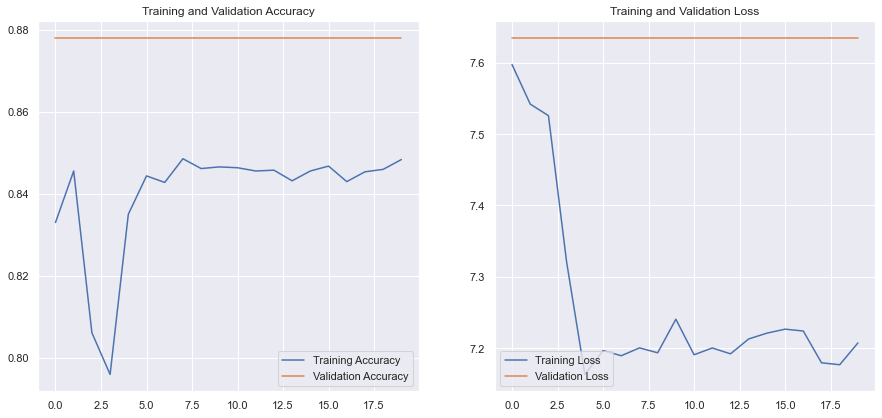

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix

In [54]:
cm = confusion_matrix(y_true=labels_test, y_pred=np.argmax(prediction, axis=-1))

In [55]:
import itertools

In [56]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
cm_labels = ['Do Not Close', 'Close']

Confusion matrix, without normalization
[[1343    0]
 [ 225    0]]


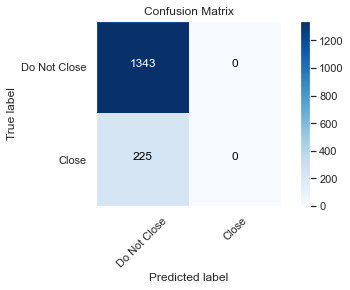

In [58]:
plot_confusion_matrix(cm=cm, classes=cm_labels, title='Confusion Matrix')

# Conclusion

I still think that I would stick with the random forrest or XGBoost model.  The accuracy was slightly higher and the confusion matrix looked normal.  Again, like in the SVM the model wants to only classify one variable however it is highly accurate at classifying that one variable.

# References

[1]https://towardsdatascience.com/introduction-to-neural-networks-advantages-and-applications-96851bd1a207#:~:text=Artificial%20Neural%20Network(ANN)%20uses,complex%20patterns%20and%20prediction%20problems.&text=In%20our%20brain%2C%20there%20are,the%20form%20of%20electric%20signals.